# 1. Fully Connected Wiring

## Visualization 1a: Shell view of Fully Connected Layer

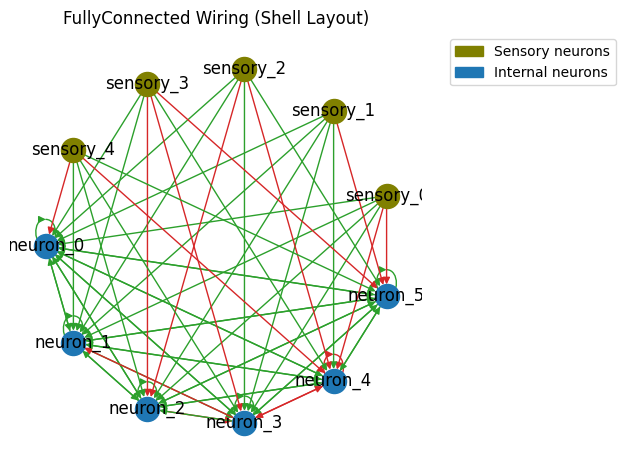

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from ncps.wirings import FullyConnected

# Create wiring
units = 6
input_dim = 5
wiring = FullyConnected(units, self_connections=True)
wiring.build(input_shape=input_dim)

# ✅ Override get_type_of_neuron so all internal are "neuron"
wiring.get_type_of_neuron = lambda i: "neuron"

# 🎨 Draw with only "sensory" and "neuron" categories
_ = wiring.draw_graph(
    layout="shell",
    draw_labels=True,
    neuron_colors={
        "sensory": "olive",
        "neuron": "tab:blue"
    }
)

# ✅ Manually build legend to exactly match what's drawn
legend_handles = [
    mpatches.Patch(color="olive", label="Sensory neurons"),
    mpatches.Patch(color="tab:blue", label="Internal neurons")
]
plt.legend(handles=legend_handles, loc="upper left", bbox_to_anchor=(1.05, 1))

plt.title("FullyConnected Wiring (Shell Layout)")
plt.axis("off")
plt.tight_layout()
plt.show()


## Visualization 1b: Horonzontal Layer view of Fully Connnected Layer

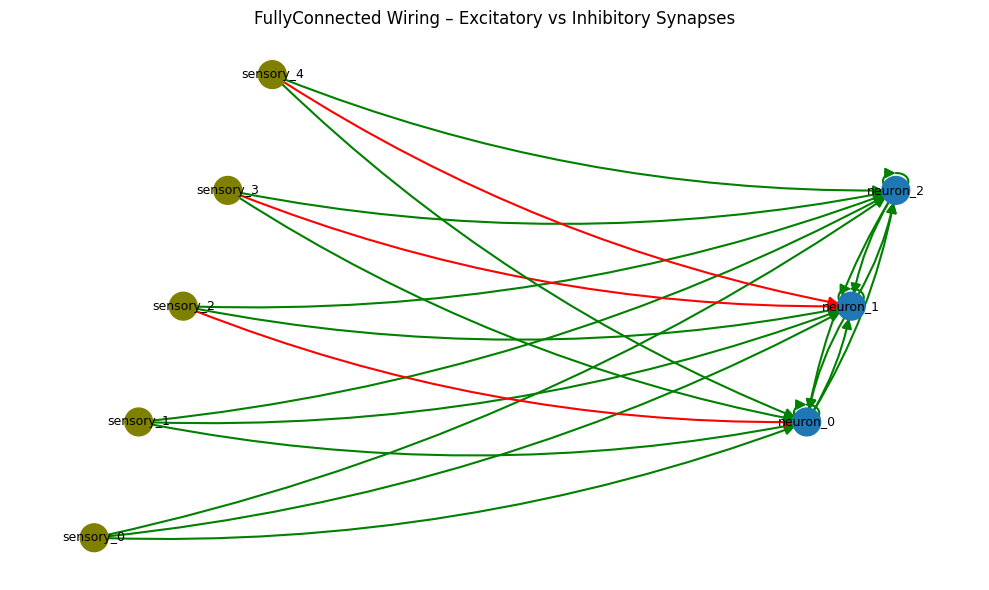

In [20]:
import matplotlib.pyplot as plt
import networkx as nx
from ncps.wirings import FullyConnected  # use your local wirings module

# Step 1: Create the wiring
units = 3        # number of internal neurons
input_dim = 5     # number of sensory neurons

wiring = FullyConnected(units, self_connections=True)
wiring.build(input_shape=input_dim)
G = wiring.get_graph()

# Step 2: Organize nodes by type
types = ["sensory", "neuron"]
layer_nodes = {
    "sensory": [n for n in G.nodes if "sensory" in n],
    "neuron": [n for n in G.nodes if "neuron" in n],
}

# Step 3: Assign horizontal layout
pos = {}
x_spacing = 3.0
for i, t in enumerate(types):
    nodes = layer_nodes[t]
    y_gap = 1.0
    y_offset = -0.5 * (len(nodes) - 1) * y_gap
    for j, n in enumerate(nodes):
        stagger = 0.2 * (j - len(nodes)/2)
        pos[n] = (i * x_spacing + stagger, y_offset + j * y_gap)

# Step 4: Draw nodes
color_map = {"sensory": "olive", "neuron": "tab:blue"}
node_colors = [color_map["sensory" if "sensory" in n else "neuron"] for n in G.nodes]

plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=400)
nx.draw_networkx_labels(G, pos, font_size=9)

# Step 5: Draw edges with polarity-based color
for u, v, d in G.edges(data=True):
    color = 'green' if d["polarity"] == "excitatory" else 'red'
    rad = 0.2 if u == v else 0.1  # show self-loops with curvature
    nx.draw_networkx_edges(
        G, pos,
        edgelist=[(u, v)],
        edge_color=color,
        width=1.5,
        arrowstyle='-|>',
        arrowsize=15,
        connectionstyle=f'arc3,rad={rad}'
    )

plt.title("FullyConnected Wiring – Excitatory vs Inhibitory Synapses")
plt.axis("off")
plt.tight_layout()
plt.show()


# 2. NCP Wiring 

## Visualization 2a: Shell view of NCP wiring

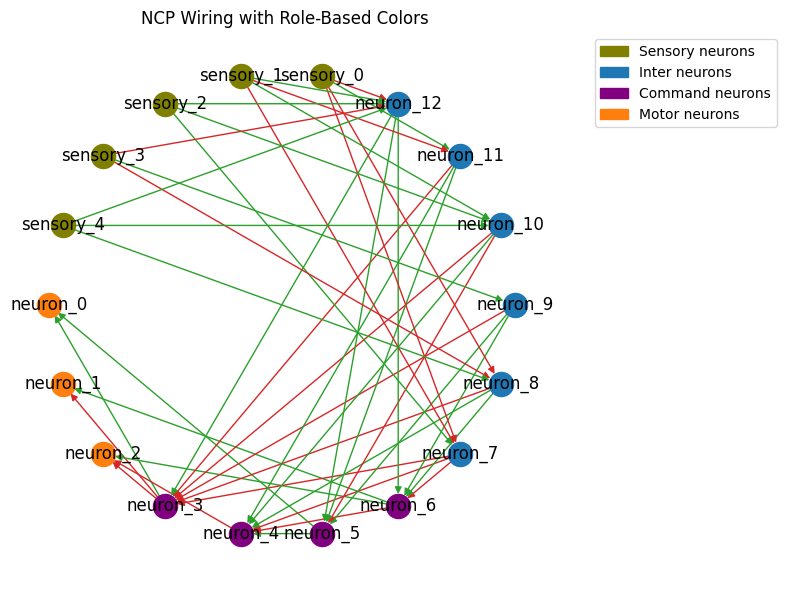

In [11]:
import matplotlib.pyplot as plt
from ncps.wirings import NCP

# Create NCP wiring
wiring2 = NCP(
    inter_neurons=6,
    command_neurons=4,
    motor_neurons=3,
    sensory_fanout=3,
    inter_fanout=3,
    recurrent_command_synapses=2,
    motor_fanin=2,
    seed=42
)

# 🔧 Build wiring with input_dim = 5 (i.e., 5 sensory neurons)
wiring2.build(input_shape=5)

# 🎨 Draw the graph
plt.figure(figsize=(8, 6))
legend_handles2 = wiring2.draw_graph(
    layout="shell",
    draw_labels=True,
    neuron_colors={
        "sensory": "olive",
        "inter": "tab:blue",
        "command": "purple",
        "motor": "tab:orange"
    }
)
plt.legend(handles=legend_handles2, loc="upper left", bbox_to_anchor=(1.05, 1))
plt.title("NCP Wiring with Role-Based Colors")
plt.axis("off")
plt.tight_layout()
plt.show()


## Visualization 2b: Horizontal layered view of NCP 

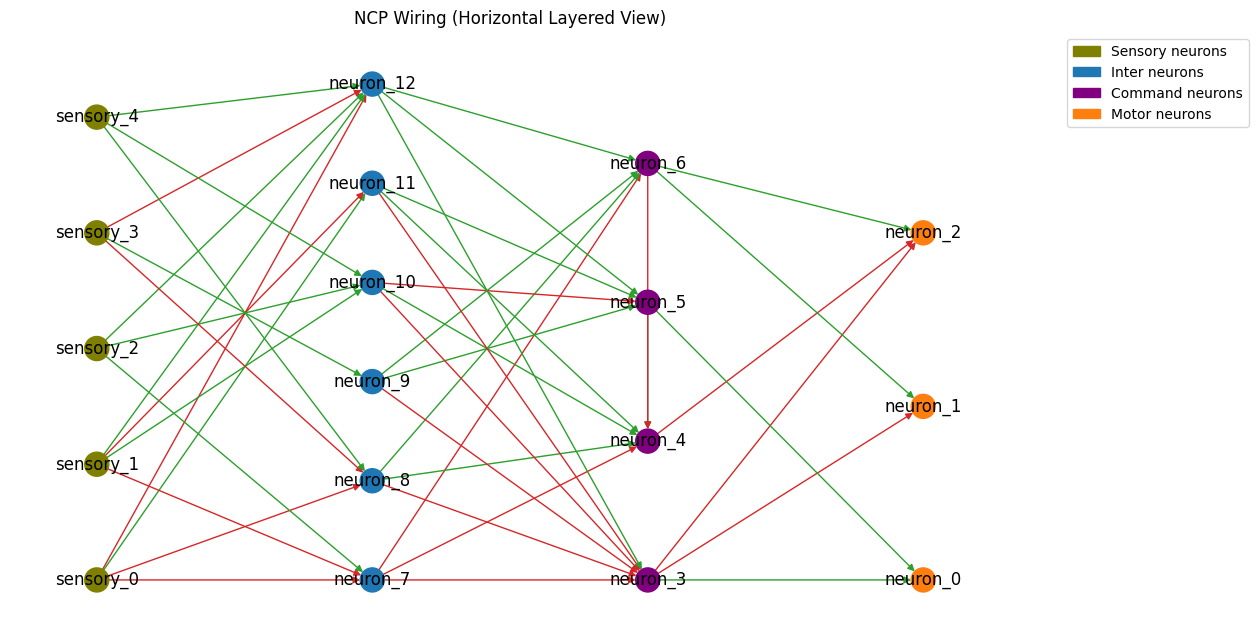

In [12]:
import matplotlib.pyplot as plt
import networkx as nx
from ncps.wirings import NCP

# Create and build wiring
wiring = NCP(
    inter_neurons=6,
    command_neurons=4,
    motor_neurons=3,
    sensory_fanout=3,
    inter_fanout=3,
    recurrent_command_synapses=2,
    motor_fanin=2,
    seed=42
)
wiring.build(input_shape=5)

# Get the graph
G = wiring.get_graph()

# Group nodes by type
types = ["sensory", "inter", "command", "motor"]
layer_nodes = {t: [n for n in G.nodes if G.nodes[n]["neuron_type"] == t] for t in types}

# Assign x by type, y by index (spread vertically)
pos = {}
x_positions = {t: i for i, t in enumerate(types)}  # sensory=0, inter=1, ...
for t in types:
    nodes = layer_nodes[t]
    y_spacing = 1.0 / (len(nodes) + 1)
    for i, n in enumerate(nodes):
        pos[n] = (x_positions[t], i * y_spacing + 0.05)

# Color mapping
node_colors = {
    "sensory": "olive",
    "inter": "tab:blue",
    "command": "purple",
    "motor": "tab:orange"
}
node_color_list = [node_colors[G.nodes[n]["neuron_type"]] for n in G.nodes]

# Edge colors
edge_color_list = [
    "tab:green" if d["polarity"] == "excitatory" else "tab:red"
    for _, _, d in G.edges(data=True)
]

# Draw
plt.figure(figsize=(10, 6))
nx.draw(
    G, pos,
    with_labels=True,
    node_color=node_color_list,
    edge_color=edge_color_list,
    arrows=True
)

plt.legend(handles=legend_handles2, loc="upper left", bbox_to_anchor=(1.05, 1))


plt.title("NCP Wiring (Horizontal Layered View)")
plt.axis("off")
plt.show()


## Visualization 2c: Highlight Inhibitory Synapses and Their Postsynaptic Targets

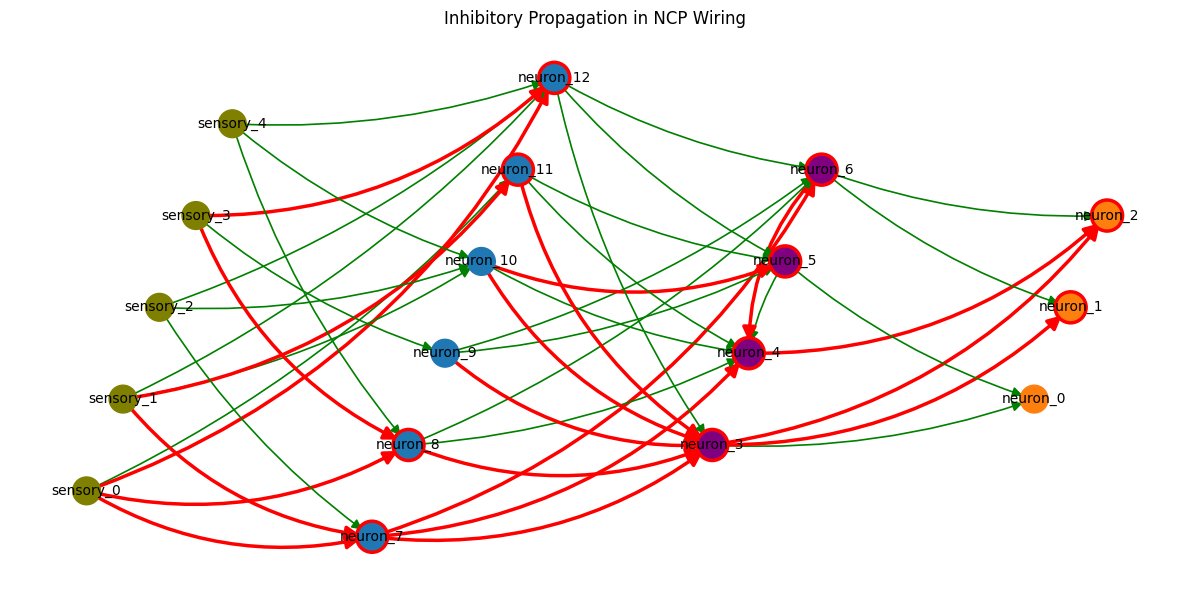

In [13]:
import matplotlib.pyplot as plt
import networkx as nx
from ncps.wirings import NCP

# Build NCP wiring
wiring = NCP(
    inter_neurons=6,
    command_neurons=4,
    motor_neurons=3,
    sensory_fanout=3,
    inter_fanout=3,
    recurrent_command_synapses=2,
    motor_fanin=2,
    seed=42
)
wiring.build(input_shape=5)
G = wiring.get_graph()

# Group neurons by type and assign horizontal layers
types = ["sensory", "inter", "command", "motor"]
layer_nodes = {t: [n for n in G.nodes if G.nodes[n]["neuron_type"] == t] for t in types}

# Compute node positions: horizontal by type, vertical spacing within type
pos = {}
x_spacing = 2.5
for i, t in enumerate(types):
    nodes = layer_nodes[t]
    y_gap = 1.0
    y_offset = -0.5 * (len(nodes) - 1) * y_gap
    for j, n in enumerate(nodes):
        stagger = 0.3 * (j - len(nodes)/2)
        pos[n] = (i * x_spacing + stagger, y_offset + j * y_gap)

# Node colors by neuron type
color_map = {"sensory": "olive", "inter": "tab:blue", "command": "purple", "motor": "tab:orange"}
node_color_list = [color_map[G.nodes[n]["neuron_type"]] for n in G.nodes]

# Draw nodes and labels
plt.figure(figsize=(12, 6))
nx.draw_networkx_nodes(G, pos, node_color=node_color_list, node_size=400)
nx.draw_networkx_labels(G, pos, font_size=10)

# Draw edges: inhibitory = red, excitatory = green
for u, v, d in G.edges(data=True):
    if d["polarity"] == "inhibitory":
        nx.draw_networkx_edges(
            G, pos, edgelist=[(u, v)],
            edge_color='red',
            width=2.5,
            arrowstyle='-|>',
            arrowsize=20,
            connectionstyle='arc3,rad=0.2'
        )
    else:
        nx.draw_networkx_edges(
            G, pos, edgelist=[(u, v)],
            edge_color='green',
            width=1.2,
            arrowstyle='-|>',
            arrowsize=15,
            connectionstyle='arc3,rad=0.1'
        )

# Identify neurons that receive inhibitory input
inhibited_nodes = {v for u, v, d in G.edges(data=True) if d["polarity"] == "inhibitory"}

# Highlight inhibited neurons with a red border
nx.draw_networkx_nodes(
    G, pos,
    nodelist=list(inhibited_nodes),
    node_color='none',
    edgecolors='red',
    linewidths=2.5,
    node_size=500
)

plt.title("Inhibitory Propagation in NCP Wiring")
plt.axis("off")
plt.tight_layout()
plt.show()


# 3. AutoNCP wiring

inter_and_command = units - output_size\

command_neurons   = max(int(0.4 * inter_and_command), 1)\
        1) check ncps.wiring, 0.4 is default split ratio not sparsity level\
        2) density = 1.0 - sparsity_level\
        3) recurrent_command_synapses = max(int(command_neurons * density * 2), 1)\

inter_neurons     = inter_and_command - command_neurons

## Visualization 3a: Shell view of AutoNCP

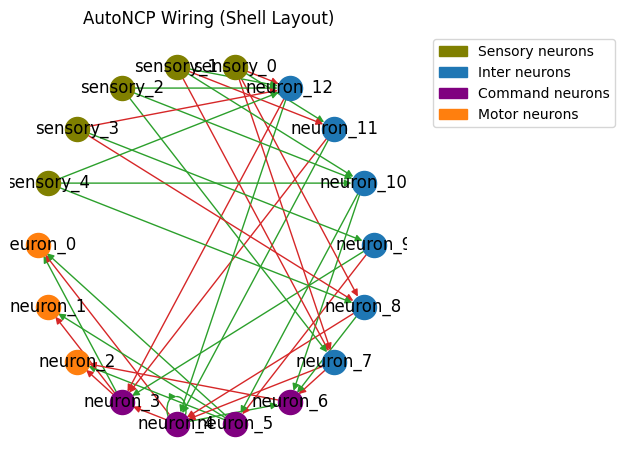

In [19]:
import matplotlib.pyplot as plt
from ncps.wirings import AutoNCP
import matplotlib.patches as mpatches

# Create AutoNCP wiring
wiring3 = AutoNCP(
    units=13,          # total number of neurons (inter + command + motor)
    output_size=3,     # number of motor neurons (i.e. output neurons)
    sparsity_level=0.5,
    seed=42
)

# Build wiring with input dimension (number of sensory neurons)
wiring3.build(input_shape=5)

# Draw the graph using shell layout with labeled neuron types
_ = wiring3.draw_graph(
    layout="shell",
    draw_labels=True,
    neuron_colors={
        "sensory": "olive",
        "inter": "tab:blue",
        "command": "purple",
        "motor": "tab:orange"
    }
)

# Build custom legend
legend_handles3 = [
    mpatches.Patch(color="olive", label="Sensory neurons"),
    mpatches.Patch(color="tab:blue", label="Inter neurons"),
    mpatches.Patch(color="purple", label="Command neurons"),
    mpatches.Patch(color="tab:orange", label="Motor neurons")
]
plt.legend(handles=legend_handles3, loc="upper left", bbox_to_anchor=(1.05, 1))

plt.title("AutoNCP Wiring (Shell Layout)")
plt.axis("off")
plt.tight_layout()
plt.show()


## Visualization 3b: Horizontal view of AutoNCP

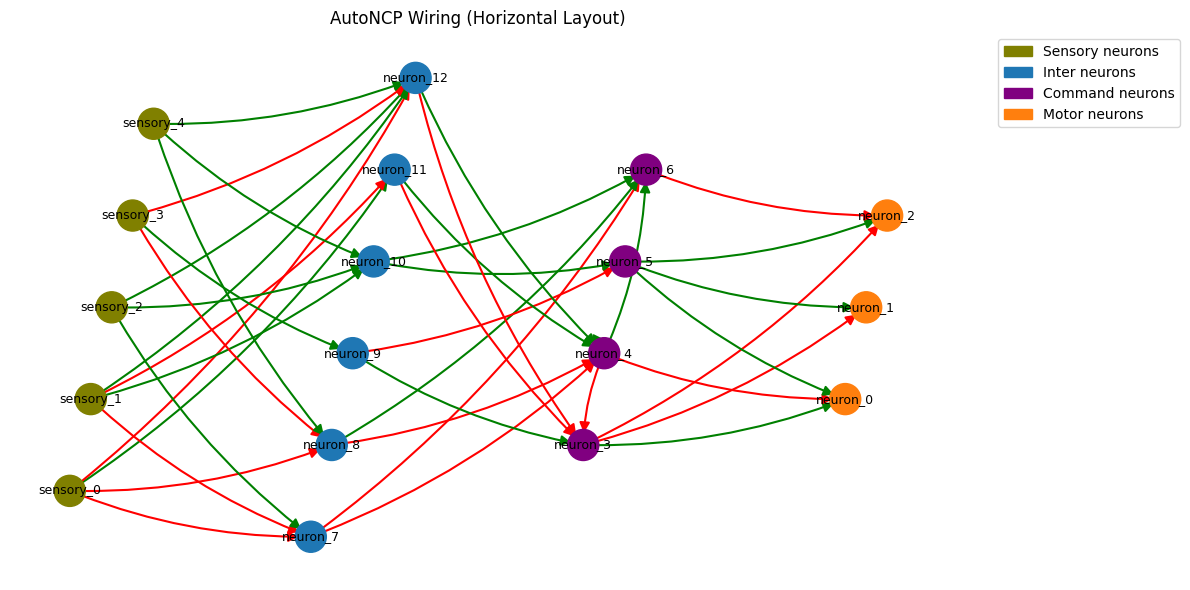

In [31]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as mpatches
from ncps_sz.ncps.wirings import AutoNCP

# Step 1: Create and build AutoNCP
wiring3 = AutoNCP(units=13, output_size=3, sparsity_level=0.5, seed=42)
wiring3.build(input_shape=5)
G = wiring3.get_graph()

# Step 2: Organize nodes by role
role_order = ["sensory", "inter", "command", "motor"]
layer_nodes = {
    role: [n for n in G.nodes if G.nodes[n]["neuron_type"] == role]
    for role in role_order
}

# Step 3: Assign horizontal layout positions
pos = {}
x_spacing = 3.0
for i, role in enumerate(role_order):
    nodes = layer_nodes[role]
    y_gap = 1.0
    y_offset = -0.5 * (len(nodes) - 1) * y_gap
    for j, n in enumerate(nodes):
        stagger = 0.25 * (j - len(nodes)/2)
        pos[n] = (i * x_spacing + stagger, y_offset + j * y_gap)

# Step 4: Draw nodes with color by type
color_map = {
    "sensory": "olive",
    "inter": "tab:blue",
    "command": "purple",
    "motor": "tab:orange"
}
node_colors = [color_map[G.nodes[n]["neuron_type"]] for n in G.nodes]

plt.figure(figsize=(12, 6))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)
nx.draw_networkx_labels(G, pos, font_size=9)

# Step 5: Draw edges with polarity coloring
for u, v, d in G.edges(data=True):
    color = "green" if d["polarity"] == "excitatory" else "red"
    rad = 0.2 if u == v else 0.1
    nx.draw_networkx_edges(
        G, pos,
        edgelist=[(u, v)],
        edge_color=color,
        width=1.5,
        arrowstyle='-|>',
        arrowsize=15,
        connectionstyle=f'arc3,rad={rad}'
    )

# Step 6: Legend
legend_handles3 = [
    mpatches.Patch(color=color_map["sensory"], label="Sensory neurons"),
    mpatches.Patch(color=color_map["inter"], label="Inter neurons"),
    mpatches.Patch(color=color_map["command"], label="Command neurons"),
    mpatches.Patch(color=color_map["motor"], label="Motor neurons")
]
plt.legend(handles=legend_handles3, loc="upper left", bbox_to_anchor=(1.05, 1))

plt.title("AutoNCP Wiring (Horizontal Layout)")
plt.axis("off")
plt.tight_layout()
plt.show()


# Visualize cusomized wiring

## Customized NCP wiring file direction

In [1]:
import sys
import os

# Step 1: Get parent directory
parent_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
print(parent_path)
# Step 2: Add it to sys.path
if parent_path not in sys.path:
    sys.path.insert(0, parent_path)


/workspace


In [2]:
from ncps_sz.ncps.tf import LTC
from ncps_sz.ncps.wirings import GridWiring

2025-07-19 08:12:26.226109: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-19 08:12:26.252297: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9373] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-19 08:12:26.252328: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-19 08:12:26.253108: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1534] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-19 08:12:26.257838: I tensorflow/core/platform/cpu_feature_guar

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import math

def plot_grid_wiring(wiring, sensory_shape=None):
    """
    绘制 GridWiring 网络结构图，支持自动判断感觉神经元为方形网格排列
    参数:
        wiring: 已构建的 GridWiring 对象
        sensory_shape: 可选 tuple，例如 (4, 5)，明确感觉神经元的形状。
                      若为 None 且为平方数，则自动推断为方形。
    """
    G = wiring.get_graph()
    pos = {}

    # 自动推断感觉神经元形状
    input_dim = wiring.input_dim
    if sensory_shape is None:
        root = int(math.sqrt(input_dim))
        if root * root == input_dim:
            sensory_h, sensory_w = root, root
        else:
            sensory_h, sensory_w = input_dim, 1  # fallback to 1 row
    else:
        sensory_h, sensory_w = sensory_shape

    neuron_h = wiring.neuron_height
    neuron_w = wiring.neuron_width

    # 感觉神经元位置：下方正方形网格或一行
    for i in range(sensory_h):
        for j in range(sensory_w):
            idx = i * sensory_w + j
            pos[f"sensory_{idx}"] = (j, -i - 1)

    # 神经元位置：上方神经元网格
    for i in range(neuron_h):
        for j in range(neuron_w):
            idx = i * neuron_w + j
            pos[f"neuron_{idx}"] = (j + 0.5, i + 0.5)

    # 颜色区分节点
    node_colors = ["olive" if "sensory" in n else "tab:blue" for n in G.nodes]

    plt.figure(figsize=(10, 6))
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=400)
    nx.draw_networkx_labels(G, pos, font_size=9)

    # 边的颜色根据极性
    edge_colors = []
    for u, v, d in G.edges(data=True):
        if d.get("polarity") == "inhibitory":
            edge_colors.append("red")
        else:
            edge_colors.append("green")

    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, arrows=True, alpha=0.7)

    plt.title("GridWiring: Sensory → Neuron + Neuron-Neuron")
    plt.axis("off")
    plt.tight_layout()
    plt.show()


In [3]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_grid_wiring(wiring, sensory_shape):
    """
    绘制 GridWiring 网络结构图
    参数:
        wiring: 已构建的 GridWiring 对象
        sensory_shape: tuple, e.g., (4, 5) 表示感觉神经元的 2D 网格尺寸
    """
    G = wiring.get_graph()
    pos = {}

    sensory_h, sensory_w = sensory_shape
    neuron_h = wiring.neuron_height
    neuron_w = wiring.neuron_width

    # 布局：感觉神经元在底部，网格排列
    for i in range(sensory_h):
        for j in range(sensory_w):
            idx = i * sensory_w + j
            pos[f"sensory_{idx}"] = (j, -i - 1)

    # 布局：神经元网格在上方
    for i in range(neuron_h):
        for j in range(neuron_w):
            idx = i * neuron_w + j
            pos[f"neuron_{idx}"] = (j + 0.5, i + 0.5)

    # 颜色：olive 感觉神经元, blue 神经元
    node_colors = ["olive" if "sensory" in n else "tab:blue" for n in G.nodes]

    plt.figure(figsize=(10, 6))
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=400)
    nx.draw_networkx_labels(G, pos, font_size=9)

    # 连接：红色 = 抑制性，绿色 = 兴奋性
    for u, v, d in G.edges(data=True):
        # Extract edge polarities
        edge_colors = []
        for u, v, d in G.edges(data=True):
            if d.get("polarity") == "inhibitory":
                edge_colors.append("red")
            else:
                edge_colors.append("green")

    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, arrows=True, alpha=0.7)
        

    plt.title("GridWiring: Sensory → Neuron + Neuron-Neuron")
    plt.axis("off")
    plt.tight_layout()
    plt.show()


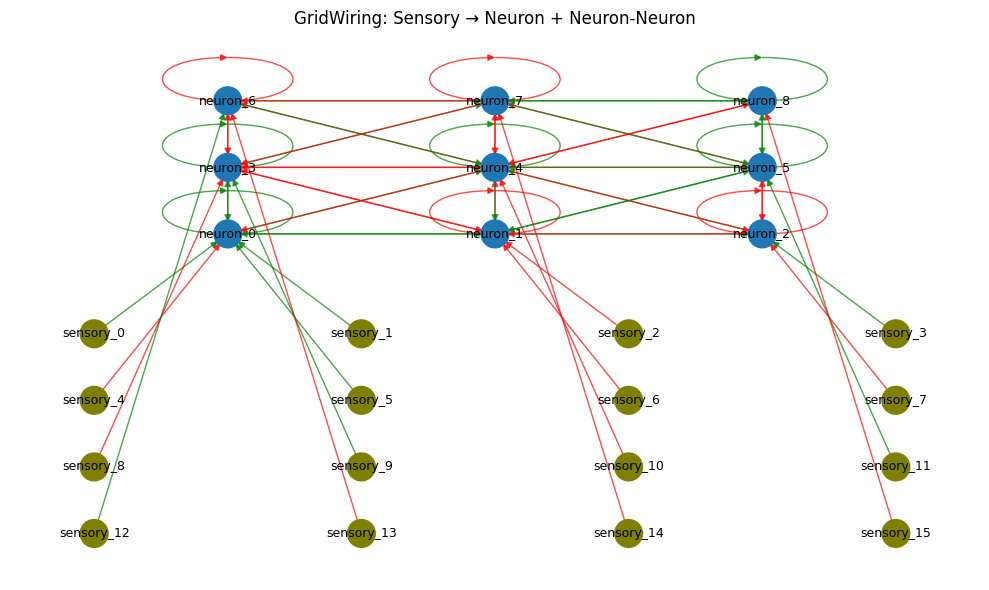

In [9]:
from ncps_sz.ncps.wirings import GridWiring


wiring = GridWiring(neuron_height=3, neuron_width=3, connectivity='8', self_connections=True, seed=40)
wiring.build(input_shape=(4, 4))  # 2D sensory shape

plot_grid_wiring(wiring, sensory_shape=(4, 4))
